## Predicting AstraZeneca Stock Prices
### Melania Czobit


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

     |████████████████████████████████| 6.3MB 12.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23819 sha256=46fd9eae0dac7cbf2e825b300327db538bd8572e8d1a7a40c4765c1485b43d5f
  Stored in directory: /root/.cache/pip/wheels/f0/be/a4/846f02c5985562250917b0ab7b33fff737c8e6e8cd5209aa3b
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**Importing stock data**

In [5]:
# get AZN data from Yahoo finance 
df = yf.download('AZN','2012-12-31','2020-01-01')

[*********************100%***********************]  1 of 1 completed


**Data Preparation**

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2012-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1763 non-null   float64
 1   High       1763 non-null   float64
 2   Low        1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Adj Close  1763 non-null   float64
 5   Volume     1763 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [7]:
# dataset is missing weekends and holidays. Backfill missing days
df = df.resample('D').bfill()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
...,...,...,...,...,...,...
2019-12-27,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-28,50.830002,50.840000,49.810001,50.009998,47.700581,1960300
2019-12-29,50.830002,50.840000,49.810001,50.009998,47.700581,1960300


In [8]:
# delete first row with date 2012-12-31. Needed to backfill row 
df = df.iloc[1:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.995001,24.100000,23.975000,24.055000,16.889841,1932200
...,...,...,...,...,...,...
2019-12-27,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-28,50.830002,50.840000,49.810001,50.009998,47.700581,1960300
2019-12-29,50.830002,50.840000,49.810001,50.009998,47.700581,1960300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2013-01-01 to 2019-12-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2556 non-null   float64
 1   High       2556 non-null   float64
 2   Low        2556 non-null   float64
 3   Close      2556 non-null   float64
 4   Adj Close  2556 non-null   float64
 5   Volume     2556 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.8 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.995001,24.100000,23.975000,24.055000,16.889841,1932200


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2.556000e+03
mean,33.604810,33.817005,33.396299,33.609597,28.449691,4.351601e+06
std,5.512456,5.542782,5.461036,5.494346,6.639866,3.781834e+06
min,22.370001,22.385000,22.230000,22.334999,16.336739,7.558000e+05
25%,29.600000,29.815000,29.500000,29.655000,24.651939,2.574800e+06
50%,33.732500,34.035000,33.599998,33.840000,27.463512,3.566650e+06
75%,36.759998,36.980000,36.560001,36.778751,31.883987,4.868800e+06
max,50.830002,51.230000,50.330002,50.459999,48.129799,5.746580e+07


In [ ]:
df.shape

(2556, 6)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Splitting into train and test set**

In [9]:
train = df.iloc[:-730,:]
test = df.iloc[-730:,:]

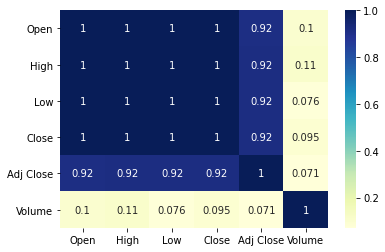

In [ ]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

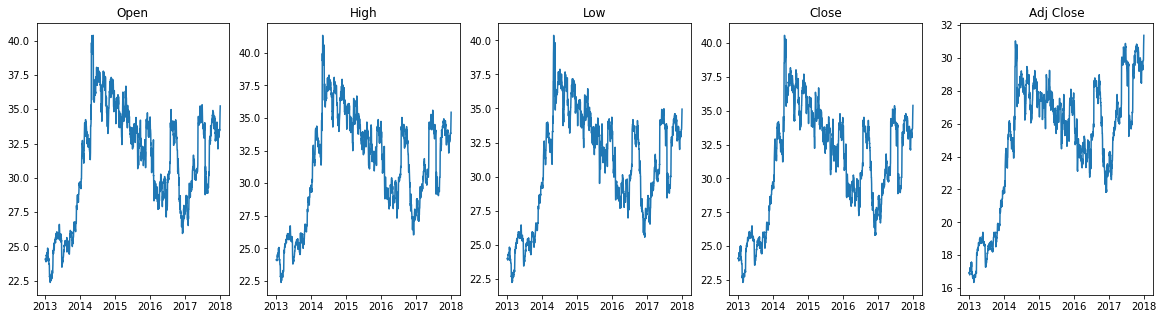

In [ ]:
figure, axis = plt.subplots(ncols=5, figsize = (20,5))
axis[0].plot(train["Open"])
axis[0].set_title("Open")

axis[1].plot(train["High"])
axis[1].set_title("High")

axis[2].plot(train["Low"])
axis[2].set_title("Low")

axis[3].plot(train["Close"])
axis[3].set_title("Close")

axis[4].plot(train["Adj Close"])
axis[4].set_title("Adj Close")

plt.show()

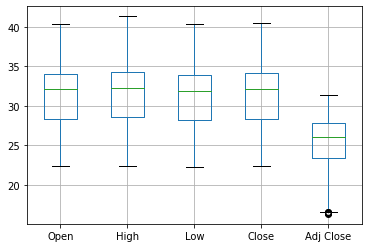

In [ ]:
train.boxplot(column=['Open','High','Low','Close','Adj Close'])

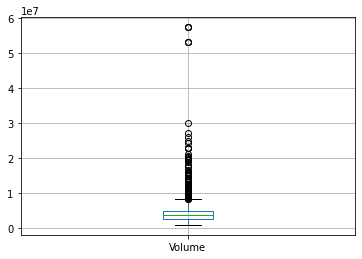

In [ ]:
train.boxplot('Volume')

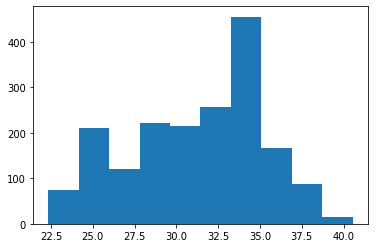

In [ ]:
plt.hist(train['Close'])
plt.show()
# distribution of close price is skewed right

**Testing for Stationarity**

In [10]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [11]:
def test_stationarity(timeseries):

  results = adfuller(timeseries, autolag='AIC')
  print('Results of Augmented Dickey Fuller Test')
  print('Test Statistic: ' + str(results[0]))
  print('p-value: ' + str(results[1]))
  print('No. of lags used: ' + str(results[2]))
  print('Number of observations used: ' + str(results[3]))

  for key, value in results[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

  if results[1] <= 0.05:
    print ("Reject null hypothesis. Data is stationary")
  else:
    print ("Fail to reject nyll hypothesis. Data is non-stationary")

In [12]:
test_stationarity(train['Close'])

Results of Augmented Dickey Fuller Test
Test Statistic: -2.29680654876106
p-value: 0.172999991796578
No. of lags used: 13
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Fail to reject nyll hypothesis. Data is non-stationary


The close price is not stationary. Need to apply differencing and transformations to make the close price stationary. 

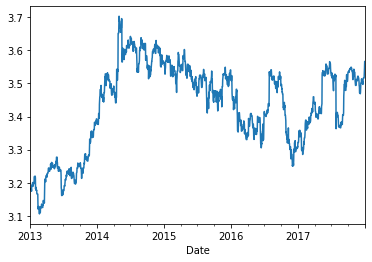

In [13]:
train['Close_log'] = np.log(train['Close'])
train['Close_log'].dropna().plot()

In [14]:
test_stationarity(train['Close_log'].dropna())

Results of Augmented Dickey Fuller Test
Test Statistic: -2.253665410603503
p-value: 0.18734729559719432
No. of lags used: 13
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Fail to reject nyll hypothesis. Data is non-stationary


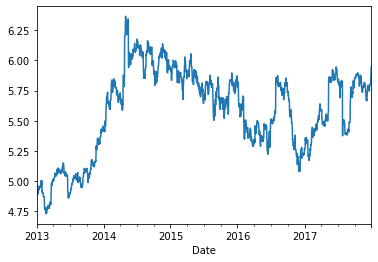

In [15]:
train['Adj_sqrt'] = np.sqrt(train['Close'])
train['Adj_sqrt'].dropna().plot()

In [16]:
test_stationarity(train['Adj_sqrt'].dropna())

Results of Augmented Dickey Fuller Test
Test Statistic: -2.270989189860908
p-value: 0.18149528077365207
No. of lags used: 13
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Fail to reject nyll hypothesis. Data is non-stationary


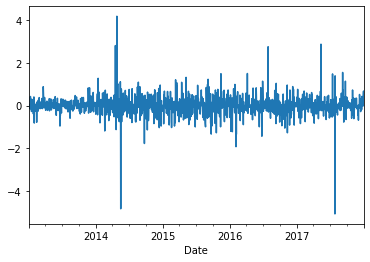

In [17]:
train['Close_diff'] = train['Close'].diff()
train['Close_diff'].dropna().plot()

In [18]:
test_stationarity(train['Close_diff'].dropna())

Results of Augmented Dickey Fuller Test
Test Statistic: -12.260086806734142
p-value: 9.120941583837678e-23
No. of lags used: 12
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Reject null hypothesis. Data is stationary


In [ ]:
Applied differencing. The data is now stationary.

In [19]:
train = train.dropna()

**Testing for autocorrelation**

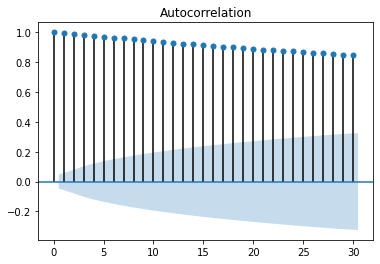

In [21]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train['Close'], lags=30);


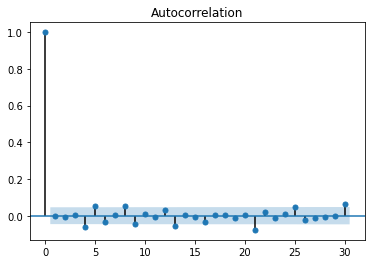

In [22]:
plot_acf(train['Close_diff'], lags=30);

**Testing for Seasonality**

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

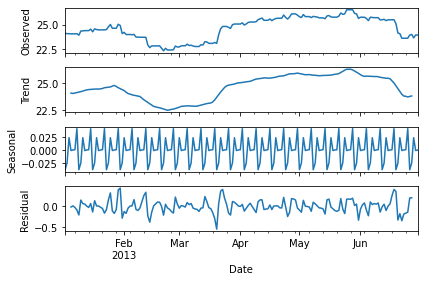

In [27]:
output = seasonal_decompose(train['Close'][:180], model='additive')
output.plot();

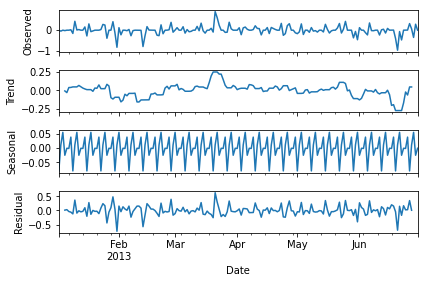

In [28]:
decomposed = seasonal_decompose(train['Close_diff'][:180], model='additive')
decomposed.plot();

Preparing train and test set for modeling

In [30]:
# dropping columns that will not be used for training the model
train_diff = train.drop(['Close_log','Adj_sqrt','Close'],1)
train_diff.shape

(1825, 6)

In [31]:
train_diff

,Open,High,Low,Adj Close,Volume,Close_diff
Date,,,,,,
2013-01-02,24.080000,24.120001,23.980000,16.935476,2812000,0.000000
2013-01-03,24.020000,24.115000,23.980000,16.903885,1941200,-0.045000
2013-01-04,23.959999,24.120001,23.959999,16.903885,1854800,0.000000
2013-01-05,23.995001,24.100000,23.975000,16.889841,1932200,-0.020000
2013-01-06,23.995001,24.100000,23.975000,16.889841,1932200,0.000000
...,...,...,...,...,...,...
2017-12-27,33.779999,33.799999,33.599998,29.914524,2566900,0.070000
2017-12-28,33.980000,34.200001,33.959999,30.260508,2445100,0.389999
2017-12-29,34.770000,34.950001,34.630001,30.783926,4096800,0.590000


In [32]:
X_train = train_diff.drop('Close_diff', 1)
X_test = test.drop('Close',1)

y_train = train_diff['Close_diff'].values
y_test = test['Close'].values

**Linear Regression Model**

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [34]:
y_prediction = model.predict(X_test)

In [35]:
predictions_diff = pd.Series(y_prediction, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  730


0   -0.019162
1   -0.019162
2    0.079653
3   -0.053769
4    0.102965
dtype: float64

In [36]:
# applying cumsum to the prediction to inverse the differencing applied to train set
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

0   -0.019162
1   -0.038323
2    0.041330
3   -0.012439
4    0.090525
dtype: float64

In [37]:
# add values from predictions_diff_cumsum to last value in train['Close']
last_price = train['Close'].iloc[-1] # Series of base number
price_diff_rev = []

for i in predictions_diff_cumsum:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

In [38]:
y_pred = np.array(price_diff_rev)

In [39]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, r2_score
print ("R2 of Linear Regresson:", r2_score(y_test,y_pred) )
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 of Linear Regresson: 0.8168717734359894
MAE:  1.4015855824929555
MSE:  3.0885890549710244
RMSE: 1.757438208009324


(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425.]), <a list of 9 Text major ticklabel objects>)

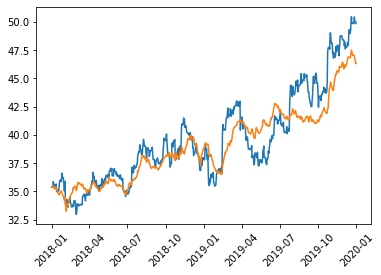

In [41]:
# plotting the close price from test set and predicted price
forecast = pd.Series(y_pred, copy=True, index=test.index)
plt.plot(test['Close'])
plt.plot(forecast)
plt.xticks(rotation=45)

**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Knn = KNeighborsRegressor(n_neighbors=3)
Knn.fit(X_train, y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knn_y_pred = Knn.predict(X_test)
print('MSE: ', mean_squared_error(y_test, knn_y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, knn_y_pred)))

MSE:  1583.3650698530105
RMSE: 39.79152007467182
